In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
evolution_log = pd.read_csv("evolution_log.csv")
event_history = pd.read_csv("event_history.csv")

In [60]:
event_history

,t,event,customer,customer_wtp,customer_max_wtp,group,price,irp,erp,rp
0,0.100689,customer_arrival,59,132,173,2,0,132,132,132
1,0.100689,sold,59,132,173,2,119,132,132,132
2,0.121992,customer_arrival,50,133,192,2,0,133,133,133
3,0.155232,customer_arrival,15,230,339,0,0,230,230,230
4,0.155232,sold,15,230,339,0,164,230,230,230
...,...,...,...,...,...,...,...,...,...,...
149,51.673390,customer_arrival,40,106,135,2,119,109,139,109
150,51.673390,sold,40,112,135,2,119,114,166,114
151,66.468575,customer_arrival,17,203,245,0,164,203,203,203
152,66.468575,customer_arrival,17,172,245,0,164,184,239,184


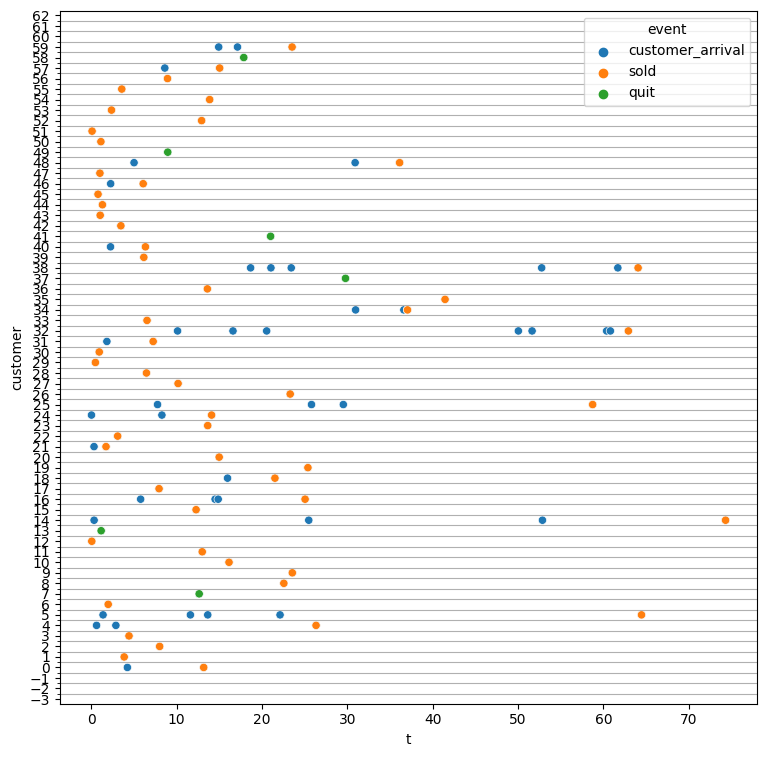

In [44]:
fig, ax = plt.subplots(figsize=(9, 9))
sns.scatterplot(x="t", y="customer", data=event_history, hue="event", ax=ax)
ax.grid(axis="y")  # Add grid lines
ax.yaxis.set_major_locator(plt.MultipleLocator(1))  # Set grid line interval to 1
ax.set_ylim(ax.get_ylim()[0] - 0.5, ax.get_ylim()[1] + 0.5)  # Extend y limits
ax.yaxis.set_major_locator(plt.MultipleLocator(1))  # Set major ticks at integers
ax.yaxis.set_minor_locator(
    plt.MultipleLocator(0.5)
)  # Set minor ticks (grid lines) at half intervals
ax.grid(True, axis="y", which="minor")  # Show minor grid lines
ax.grid(False, axis="y", which="major")  # Hide major grid lines
plt.show()

/home/laurinbrechter/.local/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 16.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


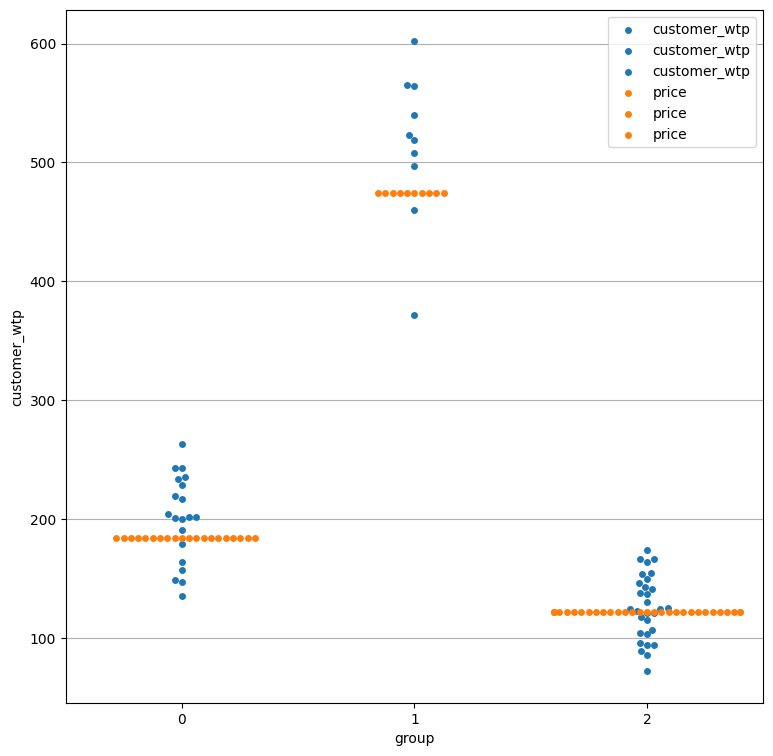

In [45]:
quit_sold = event_history.loc[event_history["event"].isin(["sold", "quit"])]
fig, ax = plt.subplots(figsize=(9, 9))
sns.swarmplot(x="group", y="customer_wtp", data=quit_sold, ax=ax, label="customer_wtp")
sns.swarmplot(x="group", y="price", data=quit_sold, ax=ax, label="price")
ax.grid(axis="y")
plt.show()

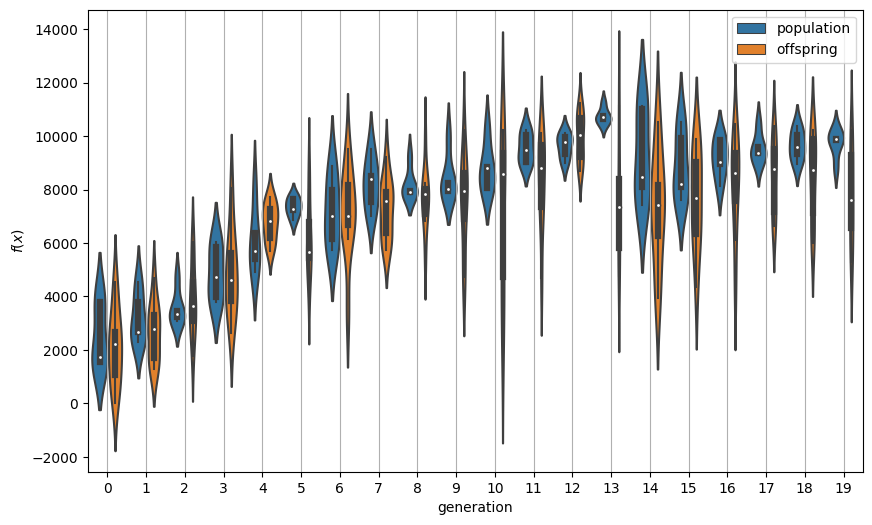

In [46]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.violinplot(
    x="generation",
    y="score",
    data=evolution_log,
    hue="type",
    ax=ax,
)
ax.legend()
ax.set_ylabel("$f(x)$")
ax.grid(axis="x")
plt.show()

<Axes: xlabel='customer', ylabel='customer_wtp'>

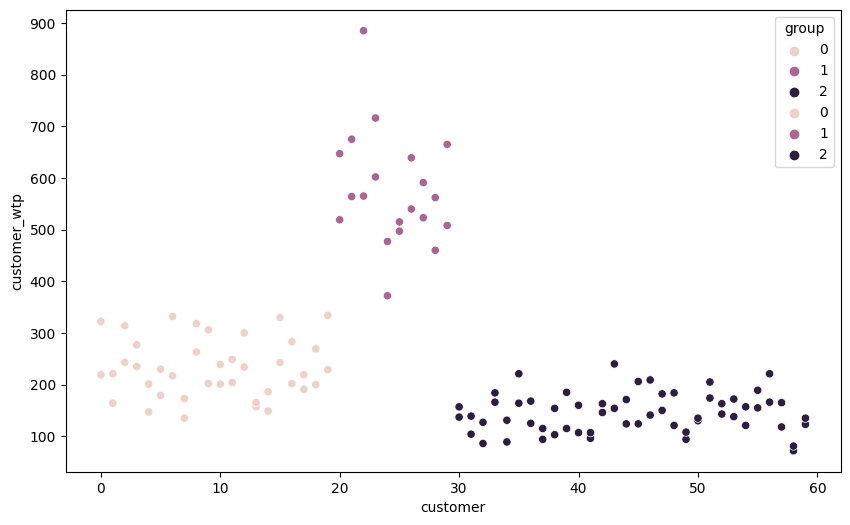

In [47]:
customers = event_history.drop_duplicates(subset=["customer"])
fig, ax = plt.subplots(figsize=(10, 6))

sns.scatterplot(x="customer", y="customer_wtp", data=customers, hue="group")
sns.scatterplot(x="customer", y="customer_max_wtp", data=customers, hue="group")

Text(0, 0.5, 'Willingness to Pay')

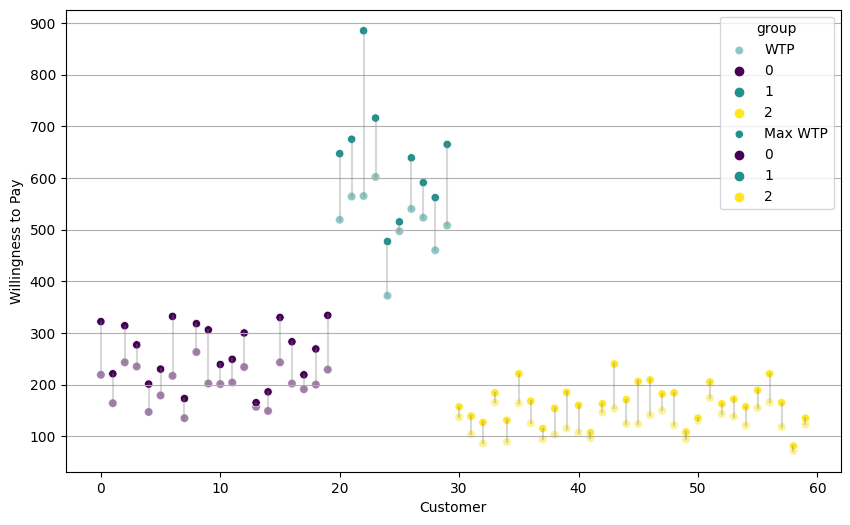

In [48]:
customers = event_history.drop_duplicates(subset=["customer"])

fig, ax = plt.subplots(figsize=(10, 6))

# First plot the scatter points
sns.scatterplot(
    x="customer",
    y="customer_wtp",
    data=customers,
    hue="group",
    label="WTP",
    palette="viridis",
    alpha=0.5,
)
sns.scatterplot(
    x="customer",
    y="customer_max_wtp",
    data=customers,
    hue="group",
    label="Max WTP",
    palette="viridis",
    alpha=1,
)

# Add lines connecting the points for each customer
for _, customer in customers.iterrows():
    ax.plot(
        [customer.customer, customer.customer],
        [customer.customer_wtp, customer.customer_max_wtp],
        color="gray",
        alpha=0.3,
        linestyle="-",
    )

ax.set_xlabel("Customer")
ax.grid(axis="y")
ax.set_ylabel("Willingness to Pay")

In [49]:
event_history

,t,event,customer,customer_wtp,customer_max_wtp,group,price
0,0.011140,customer_arrival,24,372,477,1,0
1,0.047060,customer_arrival,12,234,300,0,0
2,0.047060,sold,12,234,300,0,184
3,0.080230,customer_arrival,51,174,205,2,0
4,0.080230,sold,51,174,205,2,122
...,...,...,...,...,...,...,...
157,64.074425,sold,38,103,154,2,122
158,64.475494,customer_arrival,5,179,230,0,184
159,64.475494,sold,5,179,230,0,184
160,74.327880,customer_arrival,14,149,186,0,184


<Axes: xlabel='t', ylabel='customer_wtp'>

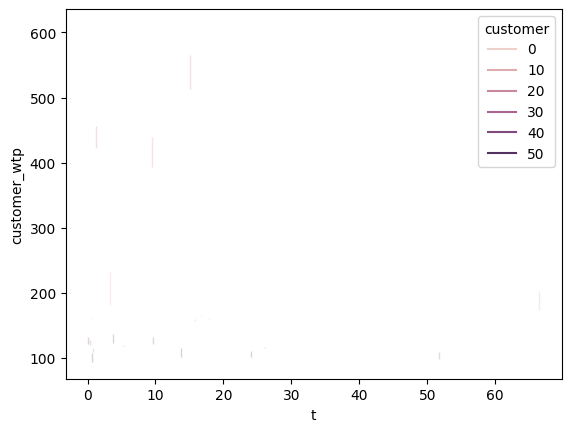

In [62]:
sns.lineplot(x="t", y="customer_wtp", data=event_history, hue="customer")

In [61]:
event_history.loc[event_history.customer == 40]

,t,event,customer,customer_wtp,customer_max_wtp,group,price,irp,erp,rp
146,51.67339,customer_arrival,40,98,135,2,0,98,98,98
148,51.67339,customer_arrival,40,98,135,2,119,98,98,98
149,51.67339,customer_arrival,40,106,135,2,119,109,139,109
150,51.67339,sold,40,112,135,2,119,114,166,114
